In [1]:
%matplotlib widget

In [2]:

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy as sp
import databento as db 
import zstandard as zstd
from databento import DBNStore
import math
import matplotlib.animation as animation # for animation
import pyarrow.parquet as pq

import time
from collections import defaultdict
from IPython.display import HTML

In [4]:
def list_flatten(xss):
    return [x for xs in xss for x in xs]

In [5]:
bclr=['r','b','g','m','y','c','k']
lstyles = ['-', '--', '-.', ':']

notebook_dir="/home/rupam/Rupam_pcloud/Quantitative_Finance/My_projects/Fin_data/"
data_path=notebook_dir+"Mini_S_and_P_futures_data/LOB_10/"


In [6]:
time=['09:30:00','16:00:00']
dates=['2022-02-02', '2022-02-03','2022-02-04']
lvl_lst=['00','02','04']
instr=['ESH2']

In [7]:
files=[data_path+f'glbx-mdp3-{day}.mbp-10.parquet' for day in [dt.replace('-','') for dt in dates]]

In [8]:
date_n_time=[[dt+' '+t for t in time] for dt in dates ]

start_and_end=[[pd.Timestamp(start).value,pd.Timestamp(end).value] for start,end in date_n_time]

lvl_obj_lst=[f'{side}_{typ}_{lvl}' 
 for side in ['bid','ask'] 
 for typ in ['px','sz','ct'] 
 for lvl in lvl_lst ]
     
cols=['ts_event','action','side','price','size']+lvl_obj_lst+['symbol']
fltrs=[[ ('symbol', '=', instr[0]), 
  ('price', '!=', 9223372036854775807), 
  ('ts_event', '>', start), 
  ('ts_event', '<=', end)] for start,end in start_and_end]

In [9]:
full_columns=['ts_event', 'rtype', 'publisher_id', 'instrument_id', 'action', 'side',
       'depth', 'price', 'size', 'flags', 'ts_in_delta', 'sequence',
       'bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00', 'bid_ct_00',
       'ask_ct_00', 'bid_px_01', 'ask_px_01', 'bid_sz_01', 'ask_sz_01',
       'bid_ct_01', 'ask_ct_01', 'bid_px_02', 'ask_px_02', 'bid_sz_02',
       'ask_sz_02', 'bid_ct_02', 'ask_ct_02', 'bid_px_03', 'ask_px_03',
       'bid_sz_03', 'ask_sz_03', 'bid_ct_03', 'ask_ct_03', 'bid_px_04',
       'ask_px_04', 'bid_sz_04', 'ask_sz_04', 'bid_ct_04', 'ask_ct_04',
       'bid_px_05', 'ask_px_05', 'bid_sz_05', 'ask_sz_05', 'bid_ct_05',
       'ask_ct_05', 'bid_px_06', 'ask_px_06', 'bid_sz_06', 'ask_sz_06',
       'bid_ct_06', 'ask_ct_06', 'bid_px_07', 'ask_px_07', 'bid_sz_07',
       'ask_sz_07', 'bid_ct_07', 'ask_ct_07', 'bid_px_08', 'ask_px_08',
       'bid_sz_08', 'ask_sz_08', 'bid_ct_08', 'ask_ct_08', 'bid_px_09',
       'ask_px_09', 'bid_sz_09', 'ask_sz_09', 'bid_ct_09', 'ask_ct_09',
       'symbol']

In [10]:
%%time
#df = pd.read_parquet(data_path+"glbx-mdp3-20220202.mbp-10.parquet",engine="pyarrow")

dataset=pq.ParquetDataset(files,filters=fltrs)
df_pq=dataset.read(columns=cols,use_threads=True).to_pandas().set_index('ts_event')

CPU times: user 7.42 s, sys: 7.55 s, total: 15 s
Wall time: 2.48 s


In [11]:
df_pq.memory_usage(deep=True).sum()/1024**3

3.3532939795404673

In [12]:
df_pq.index=pd.to_datetime(df_pq.index)
df=df_pq.sort_values('ts_event')

In [13]:
#df = pd.read_parquet(data_path+"glbx-mdp3-20220202.mbp-10.parquet",engine="pyarrow")

In [14]:
df.columns


Index(['action', 'side', 'price', 'size', 'bid_px_00', 'bid_px_02',
       'bid_px_04', 'bid_sz_00', 'bid_sz_02', 'bid_sz_04', 'bid_ct_00',
       'bid_ct_02', 'bid_ct_04', 'ask_px_00', 'ask_px_02', 'ask_px_04',
       'ask_sz_00', 'ask_sz_02', 'ask_sz_04', 'ask_ct_00', 'ask_ct_02',
       'ask_ct_04', 'symbol'],
      dtype='object')

In [15]:
df.head(5)

,action,side,price,size,bid_px_00,bid_px_02,bid_px_04,bid_sz_00,bid_sz_02,bid_sz_04,...,ask_px_00,ask_px_02,ask_px_04,ask_sz_00,ask_sz_02,ask_sz_04,ask_ct_00,ask_ct_02,ask_ct_04,symbol
ts_event,,,,,,,,,,,,,,,,,,,,,
2022-02-02 09:30:00.002132705,T,A,4563500000000,3,4563500000000,4563000000000,4562500000000,5,18,33,...,4563750000000,4564250000000,4564750000000,21,23,31,14,18,21,ESH2
2022-02-02 09:30:00.002132705,C,B,4563500000000,1,4563500000000,4563000000000,4562500000000,2,18,33,...,4563750000000,4564250000000,4564750000000,21,23,31,14,18,21,ESH2
2022-02-02 09:30:00.002488097,T,A,4563500000000,2,4563500000000,4563000000000,4562500000000,2,18,33,...,4563750000000,4564250000000,4564750000000,21,23,31,14,18,21,ESH2
2022-02-02 09:30:00.002488097,C,B,4563500000000,1,4563250000000,4562750000000,4562250000000,19,20,29,...,4563750000000,4564250000000,4564750000000,21,23,31,14,18,21,ESH2
2022-02-02 09:30:00.002686527,C,B,4563000000000,1,4563250000000,4562750000000,4562250000000,19,20,29,...,4563750000000,4564250000000,4564750000000,21,23,31,14,18,21,ESH2


In [16]:
df.iloc[2]

action                   T
side                     A
price        4563500000000
size                     2
bid_px_00    4563500000000
bid_px_02    4563000000000
bid_px_04    4562500000000
bid_sz_00                2
bid_sz_02               18
bid_sz_04               33
bid_ct_00                2
bid_ct_02               10
bid_ct_04               16
ask_px_00    4563750000000
ask_px_02    4564250000000
ask_px_04    4564750000000
ask_sz_00               21
ask_sz_02               23
ask_sz_04               31
ask_ct_00               14
ask_ct_02               18
ask_ct_04               21
symbol                ESH2
Name: 2022-02-02 09:30:00.002488097, dtype: object

In [17]:
df.loc[dates[0]]

,action,side,price,size,bid_px_00,bid_px_02,bid_px_04,bid_sz_00,bid_sz_02,bid_sz_04,...,ask_px_00,ask_px_02,ask_px_04,ask_sz_00,ask_sz_02,ask_sz_04,ask_ct_00,ask_ct_02,ask_ct_04,symbol
ts_event,,,,,,,,,,,,,,,,,,,,,
2022-02-02 09:30:00.002132705,T,A,4563500000000,3,4563500000000,4563000000000,4562500000000,5,18,33,...,4563750000000,4564250000000,4564750000000,21,23,31,14,18,21,ESH2
2022-02-02 09:30:00.002132705,C,B,4563500000000,1,4563500000000,4563000000000,4562500000000,2,18,33,...,4563750000000,4564250000000,4564750000000,21,23,31,14,18,21,ESH2
2022-02-02 09:30:00.002488097,T,A,4563500000000,2,4563500000000,4563000000000,4562500000000,2,18,33,...,4563750000000,4564250000000,4564750000000,21,23,31,14,18,21,ESH2
2022-02-02 09:30:00.002488097,C,B,4563500000000,1,4563250000000,4562750000000,4562250000000,19,20,29,...,4563750000000,4564250000000,4564750000000,21,23,31,14,18,21,ESH2
2022-02-02 09:30:00.002686527,C,B,4563000000000,1,4563250000000,4562750000000,4562250000000,19,20,29,...,4563750000000,4564250000000,4564750000000,21,23,31,14,18,21,ESH2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02 15:59:59.967130623,A,A,4555750000000,1,4555500000000,4555000000000,4554500000000,18,51,60,...,4555750000000,4556250000000,4556750000000,13,33,59,9,18,25,ESH2
2022-02-02 15:59:59.967256411,A,B,4554250000000,1,4555500000000,4555000000000,4554500000000,18,51,60,...,4555750000000,4556250000000,4556750000000,13,33,59,9,18,25,ESH2
2022-02-02 15:59:59.974628641,M,B,4554000000000,1,4555500000000,4555000000000,4554500000000,18,51,60,...,4555750000000,4556250000000,4556750000000,13,33,59,9,18,25,ESH2


In [18]:
class OrderBookFeat:
    
    def __init__(self,df):
        self.df=df
        self.lvl_list=lvl_lst
        
    def mid_price(self):
        mids={}
        for lvl in self.lvl_list:
            mids[f'mid_px_{lvl}']=(self.df[f'ask_px_{lvl}']+self.df[f'bid_px_{lvl}'])/2
        return pd.DataFrame(mids, index=self.df.index)
        
    def spread(self):
        sprd={}
        for lvl in self.lvl_list:
            sprd[f'spread_{lvl}']=self.df[f'ask_px_{lvl}']-self.df[f'bid_px_{lvl}']
        return pd.DataFrame(sprd, index=self.df.index)

    def rel_spread(self):
        rel_sprd={}
        for lvl in self.lvl_list:
            rel_sprd[f'rel_spread_{lvl}']=2*(self.df[f'ask_px_{lvl}']-self.df[f'bid_px_{lvl}'])/(self.df[f'ask_px_{lvl}']+self.df[f'bid_px_{lvl}'])
        return pd.DataFrame(rel_sprd, index=self.df.index)

    def ob_imbl(self):
        imbl={}
        for lvl in self.lvl_list:
            imbl[f'ob_imbl_{lvl}']=(self.df[f'bid_sz_{lvl}']-self.df[f'ask_sz_{lvl}'])/(self.df[f'bid_sz_{lvl}']+self.df[f'ask_sz_{lvl}'])
        return pd.DataFrame(imbl, index=self.df.index)

    def quote_return(self,case='log'):
        rtn={}
        for lvl in self.lvl_list:
            mid=(self.df[f'ask_px_{lvl}']+self.df[f'bid_px_{lvl}'])/2
            if case =='abs':
                rtn[f'abs_return_{lvl}']=mid.diff()/mid.shift(1) # or mid.pct_change()
            elif case =='log':
                rtn[f'log_return_{lvl}']=np.log(mid).diff()
        return pd.DataFrame(rtn, index=self.df.index)

    def volatility(self,win=1000):
        vol={}
        for lvl in self.lvl_list:
            mid=(self.df[f'ask_px_{lvl}']+self.df[f'bid_px_{lvl}'])/2
            rtn=mid.diff()/mid.shift(1)
            vol[f'vol_{win}_{lvl}']=rtn.rolling(window=win).std()
        return pd.DataFrame(vol, index=self.df.index)



In [19]:
all_feat=['mid_price','spread','ob_imbl','quote_return','rel_spread','volatility']

In [20]:
def comb_df(cls,df,meths):
    df_combined=pd.concat([getattr(cls(df),inst)() for inst in meths], axis=1)
    return df_combined

In [21]:
OrderBookFeat(df).mid_price().values

array([[4.563625e+12, 4.563625e+12, 4.563625e+12],
       [4.563625e+12, 4.563625e+12, 4.563625e+12],
       [4.563625e+12, 4.563625e+12, 4.563625e+12],
       ...,
       [4.451125e+12, 4.451125e+12, 4.451125e+12],
       [4.451125e+12, 4.451125e+12, 4.451125e+12],
       [4.451125e+12, 4.451125e+12, 4.451125e+12]])

In [22]:
OrderBookFeat(df.loc[dates[0]]).mid_price()

,mid_px_00,mid_px_02,mid_px_04
ts_event,,,
2022-02-02 09:30:00.002132705,4.563625e+12,4.563625e+12,4.563625e+12
2022-02-02 09:30:00.002132705,4.563625e+12,4.563625e+12,4.563625e+12
2022-02-02 09:30:00.002488097,4.563625e+12,4.563625e+12,4.563625e+12
2022-02-02 09:30:00.002488097,4.563500e+12,4.563500e+12,4.563500e+12
2022-02-02 09:30:00.002686527,4.563500e+12,4.563500e+12,4.563500e+12
...,...,...,...
2022-02-02 15:59:59.967130623,4.555625e+12,4.555625e+12,4.555625e+12
2022-02-02 15:59:59.967256411,4.555625e+12,4.555625e+12,4.555625e+12
2022-02-02 15:59:59.974628641,4.555625e+12,4.555625e+12,4.555625e+12


In [23]:
#For one dataframe and one day, multi-features
# def plot_time_series(df,title='Order Book Features', steps=100000):
#     cols=df.columns
#     dt=str(df.index[0].date())
#     grp=defaultdict(list)
#     for col in cols:
#         key=col.rsplit('_',1)[0]
#         grp[key].append(col)
#     grpd_cols=dict(grp)
#     n = len(grpd_cols)
#     ncols= 2 if n>1 else 1
#     nrows= math.ceil(n / ncols)
     

#     fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5.5 * ncols, 3.5 * nrows))
#     axs = axs.flatten() if n > 1 else [axs]

#     lines = []
#     y_list = []

#     for i in range(n):
#         df_rs = df.iloc[::steps]
#         x=df_rs.index.values
#         grp_obj=list(dict(grpd_cols).values())[i]
#         grp_key=list(dict(grpd_cols).keys())[i]
#         ax = axs[i]
#         ax.set_xlim(np.nanmin(x), np.nanmax(x))
#         ax.set_xlabel("Time index (sampled)")
#         ax.set_ylabel("Value")
#         ax.grid(True)
#         ax.set_title(grp_key, fontsize=14)
#         grp_lines=[]
#         grp_y=[]
#         for j in range(len(grp_obj)):
#             y=df_rs[grp_obj[j]].values
#             line, = ax.plot([], [], label=grp_obj[j].rsplit('_',1)[1], color=bclr[j],ls=lstyles[j], alpha=0.5)
#             grp_lines.append(line)
#             grp_y.append(y)
#         ax.legend(title='Levels',loc='best', ncol=len(grp_obj))
#         ax.set_ylim(np.nanmin(grp_y), np.nanmax(grp_y))
                
#         lines.append(grp_lines)
#         y_list.append(grp_y)    

#     for j in range(i + 1, len(axs)):
#         fig.delaxes(axs[j])

#     def update(frame):
#         for i in range(n):
#             grp_obj=list(dict(grpd_cols).values())[i]
#             for j in range(len(grp_obj)):
#                 lines[i][j].set_data(x[:frame], y_list[i][j][:frame])
#         return lines

#     ani = animation.FuncAnimation(fig, update, frames=len(x), interval=20, blit=False, repeat=False)

#     fig.suptitle(title+' '+dt, fontsize=18)
#     fig.tight_layout()
#     plt.show()

#     return ani



# Then plotting for multiple dates :

#Inter days plot 
# def plot_multi_day_time_series(cls,df,feats,dates,steps=100000):
#     anis=[]
#     for d in dates: 
#         df_combined=comb_df(cls,df,feats,d)
#         title='Order Book Features'
#         ani=plot_time_series(df_combined,title=title,steps=steps)
#         anis.append(ani)
#     return anis

In [24]:
def plot_time_series(df,dts=dates,title='Order Book Features', steps=100000):
    cols=df.columns
    grp=defaultdict(list)
    for col in cols:
        key=col.rsplit('_',1)[0]
        grp[key].append(col)
    grpd_cols=dict(grp)
    n = len(grpd_cols)
    ncols= n 
    nrows= len(dts) 


    
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5.5*ncols,3.5*nrows))
    axs = np.array(axs).reshape(nrows,ncols)


    lines = []
    y_list = []
    x_list=[]

    for k in range(nrows):
        row_line=[]
        row_y_list=[]
        for i in range(n):
            df_rs = df.loc[dts[k]].iloc[::steps]
            x=df_rs.index.values
            grp_obj=list(dict(grpd_cols).values())[i]
            grp_key=list(dict(grpd_cols).keys())[i]
            ax = axs[k][i]
            ax.set_xlim(np.nanmin(x), np.nanmax(x))
            ax.set_xlabel("Time index (sampled)")
            ax.set_ylabel("Value")
            ax.grid(True)
            ax.set_title(grp_key, fontsize=15)
            grp_lines=[]
            grp_y=[]
            for j in range(len(grp_obj)):
                y=df_rs[grp_obj[j]].values
                line, = ax.plot([], [], label=grp_obj[j].rsplit('_',1)[1], color=bclr[j],ls=lstyles[j], alpha=0.5)
                grp_lines.append(line)
                grp_y.append(y)
            ax.legend(title='Levels',loc='best', ncol=len(grp_obj))
            ax.set_ylim(np.nanmin(grp_y), np.nanmax(grp_y))
            ax.text(0.1, 0.5, dts[k], fontsize=13, va='center', ha='left',transform=ax.transAxes)
            row_line.append(grp_lines)
            row_y_list.append(grp_y)
        

        lines.append(row_line)
        y_list.append(row_y_list)
        x_list.append(x)



    def update(frame):
        for k in range(nrows):
            for i in range(n):
                grp_obj=list(dict(grpd_cols).values())[i]
                for j in range(len(grp_obj)):
                    lines[k][i][j].set_data(x_list[k][:frame], y_list[k][i][j][:frame])
        return lines

    ani = animation.FuncAnimation(fig, update, frames=len(x), interval=20, blit=False, repeat=False)

    fig.suptitle(title, fontsize=20)
    fig.tight_layout()
    plt.show()

    return ani


In [25]:
OrderBookFeat(df.loc[dates[0]]).volatility(win=100).max()

vol_100_00    0.000143
vol_100_02    0.000110
vol_100_04    0.000088
dtype: float64

In [28]:
comb_df(OrderBookFeat,df,all_feat[:4])

,mid_px_00,mid_px_02,mid_px_04,spread_00,spread_02,spread_04,ob_imbl_00,ob_imbl_02,ob_imbl_04,log_return_00,log_return_02,log_return_04
ts_event,,,,,,,,,,,,
2022-02-02 09:30:00.002132705,4.563625e+12,4.563625e+12,4.563625e+12,250000000,1250000000,2250000000,1.651910e+08,1.047553e+08,3.125000e-02,NaN,NaN,NaN
2022-02-02 09:30:00.002132705,4.563625e+12,4.563625e+12,4.563625e+12,250000000,1250000000,2250000000,1.867377e+08,1.047553e+08,3.125000e-02,0.000000,0.000000,0.000000
2022-02-02 09:30:00.002488097,4.563625e+12,4.563625e+12,4.563625e+12,250000000,1250000000,2250000000,1.867377e+08,1.047553e+08,3.125000e-02,0.000000,0.000000,0.000000
2022-02-02 09:30:00.002488097,4.563500e+12,4.563500e+12,4.563500e+12,500000000,1500000000,2500000000,1.073742e+08,9.988296e+07,7.158279e+07,-0.000027,-0.000027,-0.000027
2022-02-02 09:30:00.002686527,4.563500e+12,4.563500e+12,4.563500e+12,500000000,1500000000,2500000000,1.073742e+08,9.988296e+07,7.158279e+07,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-04 15:59:59.983449763,4.451125e+12,4.451125e+12,4.451125e+12,250000000,1250000000,2250000000,3.571429e-01,1.807229e-01,2.045455e-01,0.000000,0.000000,0.000000
2022-02-04 15:59:59.991730891,4.451125e+12,4.451125e+12,4.451125e+12,250000000,1250000000,2250000000,4.074074e-01,1.807229e-01,2.045455e-01,0.000000,0.000000,0.000000
2022-02-04 15:59:59.991830851,4.451125e+12,4.451125e+12,4.451125e+12,250000000,1250000000,2250000000,4.615385e-01,1.807229e-01,2.045455e-01,0.000000,0.000000,0.000000


/home/rupam/anaconda3/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


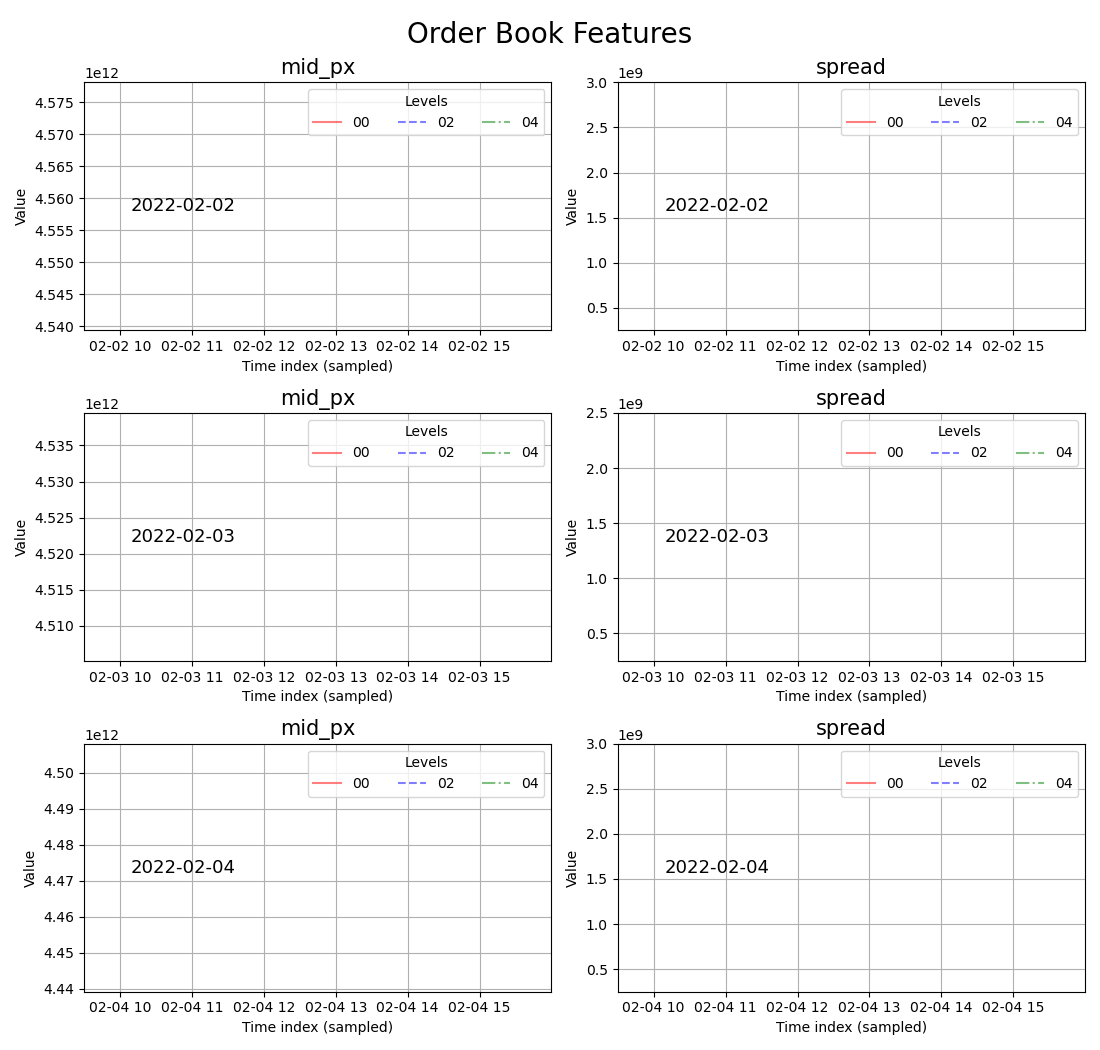

In [27]:
plot_time_series(comb_df(OrderBookFeat,df,all_feat[:2]),steps=5000)

In [31]:
#resampling in 1s and 5s bars

def time_resampler(df,meth_list,dt:str):
    obj=OrderBookFeat(df)
    df_rs=[]
    for meth in meth_list:
        df_avg=getattr(obj,meth)().resample(dt).mean()
        df_avg.columns=['avg_'+col for col in df_avg.columns]
        df_rs.append(df_avg)

    df_rs=pd.concat(df_rs, axis=1)
    return df_rs.dropna()

In [32]:
all_feat[:1]

['mid_price']

In [33]:
time_resampler(df,all_feat[:1],'5s')

,avg_mid_px_00,avg_mid_px_02,avg_mid_px_04
ts_event,,,
2022-02-02 09:30:00,4.563768e+12,4.563768e+12,4.563768e+12
2022-02-02 09:30:05,4.564088e+12,4.564088e+12,4.564088e+12
2022-02-02 09:30:10,4.564360e+12,4.564360e+12,4.564360e+12
2022-02-02 09:30:15,4.564301e+12,4.564301e+12,4.564301e+12
2022-02-02 09:30:20,4.564534e+12,4.564534e+12,4.564534e+12
...,...,...,...
2022-02-04 15:59:35,4.450305e+12,4.450305e+12,4.450305e+12
2022-02-04 15:59:40,4.450928e+12,4.450928e+12,4.450928e+12
2022-02-04 15:59:45,4.451092e+12,4.451092e+12,4.451092e+12


/home/rupam/anaconda3/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


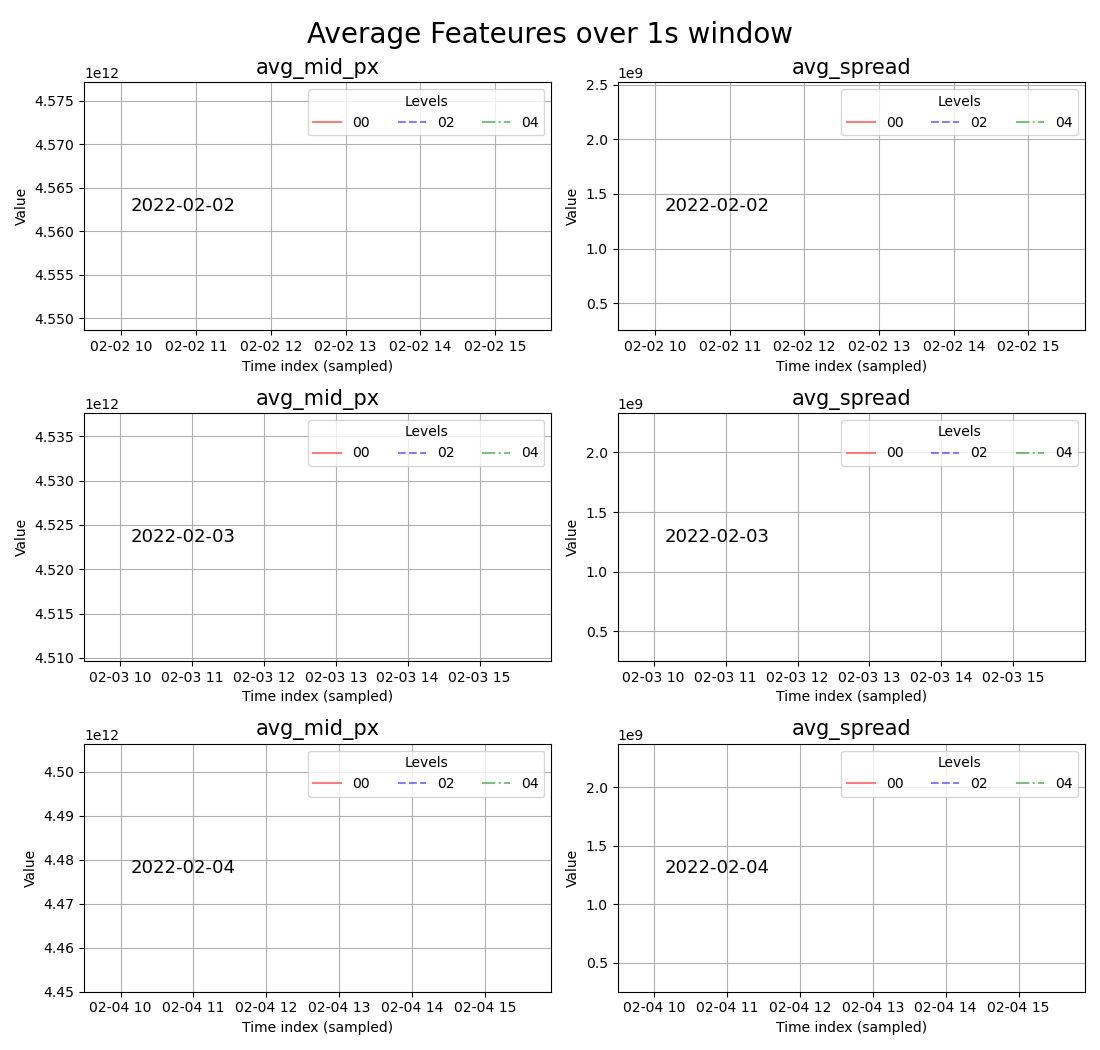

In [34]:
plot_time_series(time_resampler(df,all_feat[:2],'1s'),title='Average Feateures over 1s window', steps = 1000)

In [75]:
def plot_histogram(df,dts=dates,title='Histogram of avg quantities',bins=100):
    cols=df.columns
    grp=defaultdict(list)
    for col in cols:
        key=col.rsplit('_',1)[0]
        grp[key].append(col)
    grpd_cols=dict(grp)
    n = len(grpd_cols)
    ncols= n 
    nrows= len(dts) 
     

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5.5 * ncols, 3.5 * nrows))
    axs = np.array(axs).reshape(nrows,ncols)

    for k in range(nrows):
        for i in range(n):
            grp_obj=list(dict(grpd_cols).values())[i]
            grp_key=list(dict(grpd_cols).keys())[i]
            ax = axs[k][i]
            count_lst=[]
            edge_lst=[]
            for j in range(len(grp_obj)):
                counts,bin_edges,patches = ax.hist(df[grp_obj[j]],bins=bins, label=grp_obj[j].rsplit('_',1)[1], 
                                               color=bclr[j],edgecolor='black',alpha=0.5)
                count_lst.append(counts)
                edge_lst.append(bin_edges)
                ax.set_xlim(np.nanmin(edge_lst), np.nanmax(edge_lst))
                ax.set_xlabel(grp_key)
                ax.set_ylabel('Counts')
                ax.grid(True)
                ax.set_title(grp_key, fontsize=14)
                ax.legend(title='Levels',loc='best', ncol=len(grp_obj))
                ax.text(0.1, 0.5, dts[k], fontsize=13, va='center', ha='left',transform=ax.transAxes)


    # for j in range(i + 1, len(axs)):
    #     fig.delaxes(axs[j])

    fig.suptitle(title, fontsize=16)
    fig.tight_layout()
    plt.show()

/tmp/ipykernel_187188/2861533745.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5.5 * ncols, 3.5 * nrows))
/home/rupam/anaconda3/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


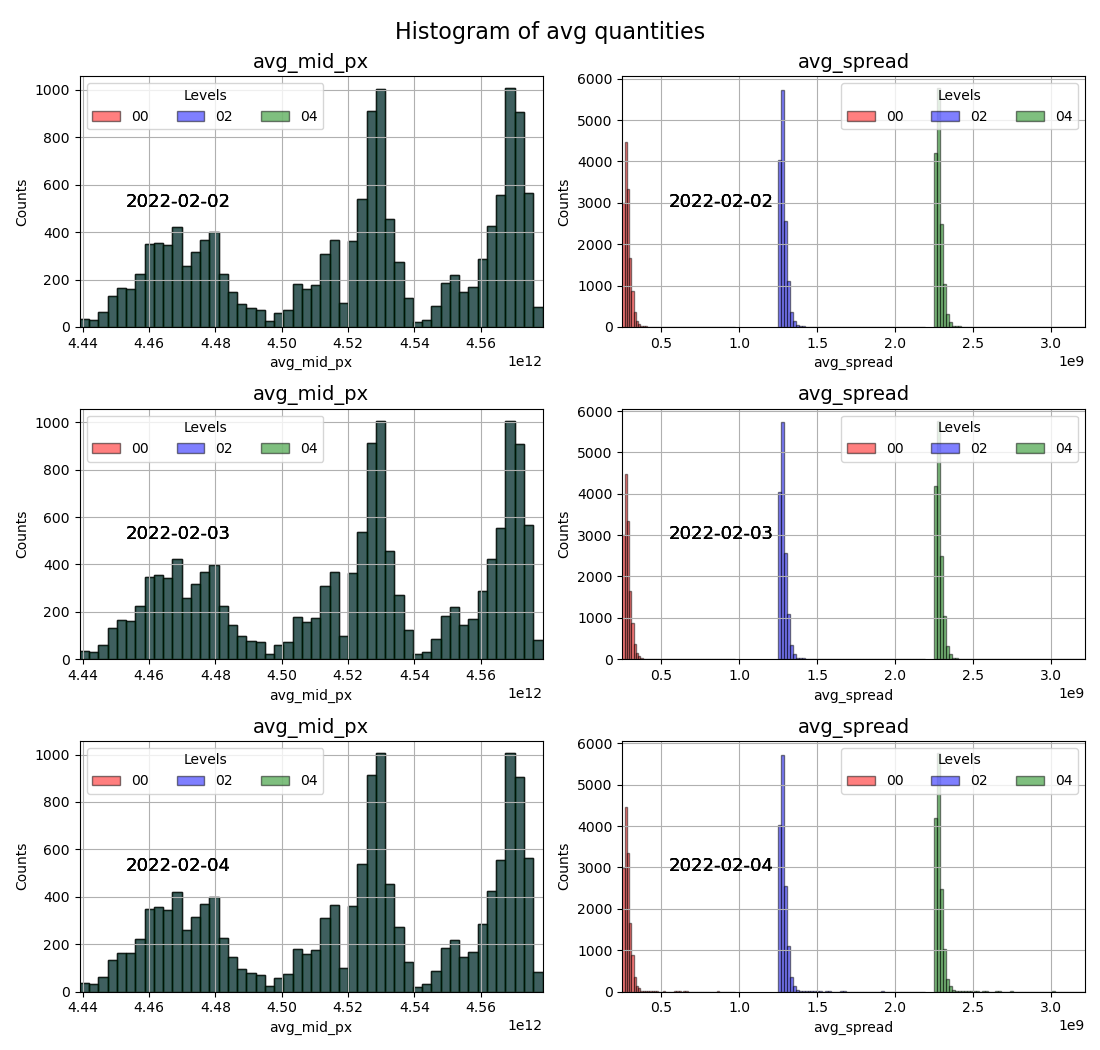

In [78]:
plot_histogram(time_resampler(df,all_feat[:2],'5s'),bins=50)

/home/rupam/anaconda3/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


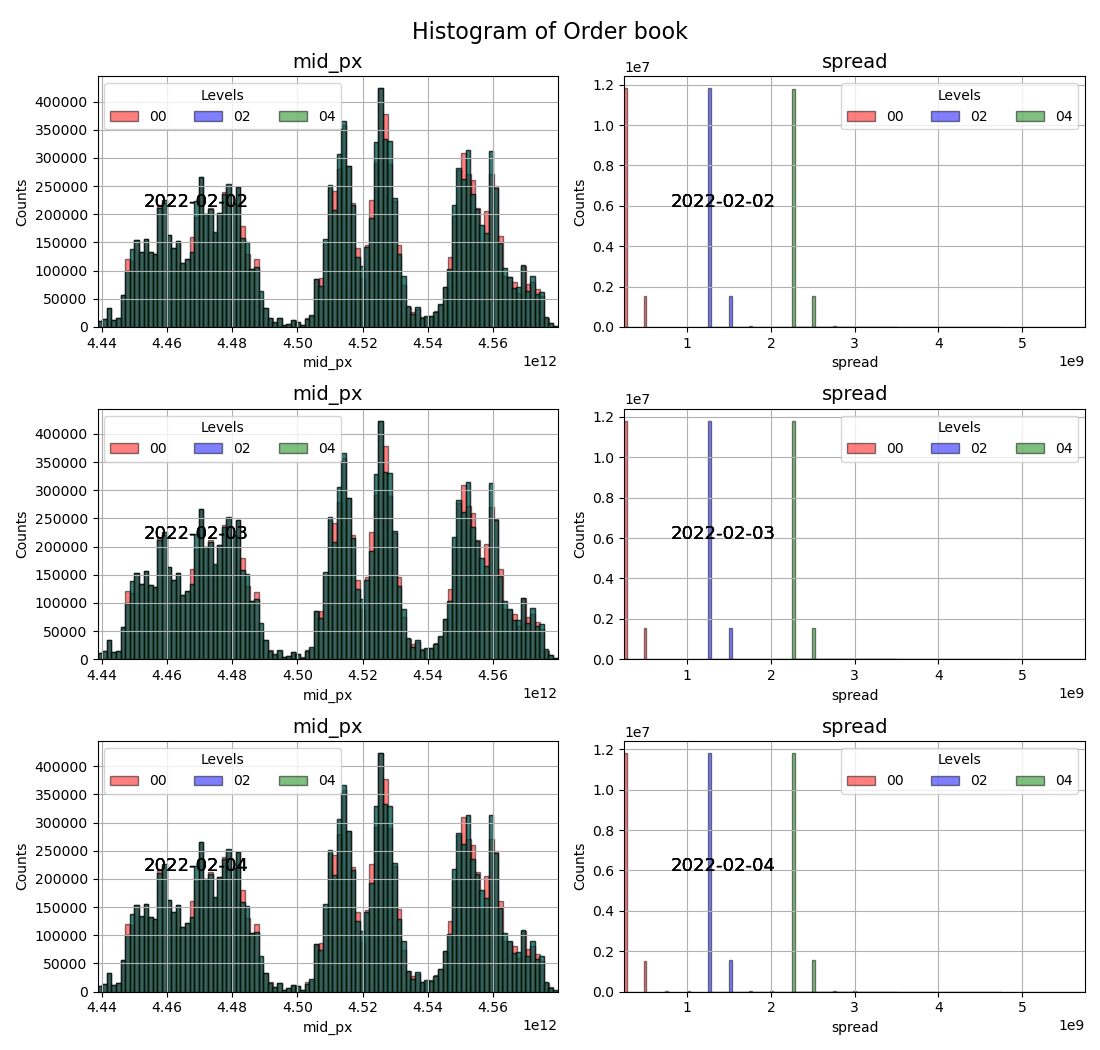

In [80]:
plot_histogram(comb_df(OrderBookFeat,df,all_feat[:2]),title='Histogram of Order book',bins=100)

In [25]:
#
df1=df.loc[dates[0]]

In [26]:
df1.columns

Index(['action', 'side', 'price', 'size', 'bid_px_00', 'bid_px_02',
       'bid_px_04', 'bid_sz_00', 'bid_sz_02', 'bid_sz_04', 'bid_ct_00',
       'bid_ct_02', 'bid_ct_04', 'ask_px_00', 'ask_px_02', 'ask_px_04',
       'ask_sz_00', 'ask_sz_02', 'ask_sz_04', 'ask_ct_00', 'ask_ct_02',
       'ask_ct_04', 'symbol'],
      dtype='object')

In [27]:
df1=df1[[col for col in df1.columns if not col.endswith(('02','04'))]]

In [28]:
df1

,action,side,price,size,bid_px_00,bid_sz_00,bid_ct_00,ask_px_00,ask_sz_00,ask_ct_00,symbol
ts_event,,,,,,,,,,,
2022-02-02 09:30:00.002132705,T,A,4563500000000,3,4563500000000,5,5,4563750000000,21,14,ESH2
2022-02-02 09:30:00.002132705,C,B,4563500000000,1,4563500000000,2,2,4563750000000,21,14,ESH2
2022-02-02 09:30:00.002488097,T,A,4563500000000,2,4563500000000,2,2,4563750000000,21,14,ESH2
2022-02-02 09:30:00.002488097,C,B,4563500000000,1,4563250000000,19,8,4563750000000,21,14,ESH2
2022-02-02 09:30:00.002686527,C,B,4563000000000,1,4563250000000,19,8,4563750000000,21,14,ESH2
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02 15:59:59.967130623,A,A,4555750000000,1,4555500000000,18,12,4555750000000,13,9,ESH2
2022-02-02 15:59:59.967256411,A,B,4554250000000,1,4555500000000,18,12,4555750000000,13,9,ESH2
2022-02-02 15:59:59.974628641,M,B,4554000000000,1,4555500000000,18,12,4555750000000,13,9,ESH2


In [49]:
df1[(df1['price']>df1['ask_px_00'])& (df1['action']=='T')&(df1['side']=='A') ]

,action,side,price,size,bid_px_00,bid_sz_00,bid_ct_00,ask_px_00,ask_sz_00,ask_ct_00,symbol
ts_event,,,,,,,,,,,


In [254]:
## Trading engine

class order_engine():

    def __init__(self,curent_time, current_book, order_book, cash,inventory,imbl_val,recent_mid_px_lst):
        self.cash=cash # dollars
        self.current_time=current_time
        self.current_book=current_book
        self.order_book=order_book
        self.bid_px=current_book['bid_px_00']*1e-9 # dollars
        self.ask_px=current_book['ask_px_00']*1e-9
        self.bid_sz=current_book['bid_sz_00']
        self.ask_sz=current_book['ask_sz_00']
        self.inventory=inventory
        self.mid_px=(self.bid_px+self.ask_px)/2
        self.mid_lst=recent_mid_px_lst
        self.ob_imbl=(self.bid_sz-self.ask_sz)/(self.bid_sz+self.ask_sz)
        self.imbl_val=imbl_val
        print()
        
        
    def order_and_exec(self):
        mid_trend_up=(len(self.mid_lst)>=3 and self.mid_lst[0]<self.mid_lst[1]<self.mid_lst[2])
        mid_trend_down=(len(self.mid_lst)>=3 and self.mid_lst[0]>self.mid_lst[1]>self.mid_lst[2])

        for order in self.order_book[:]:
            
            if order['side']=='B' and self.ask_px==order['price'] and self.cash>self.bid_px:
                print('Limit Buy Trade')
                self.cash-=self.ask_px
                self.inventory+=1
                self.order_book.remove(order)
            elif order['side']=='A' and self.bid_px==order['price'] and self.inventory>=1:
                print('Limit Sell Trade')
                self.cash+=self.bid_px
                self.inventory-=1
                self.order_book.remove(order)
                
        if self.ob_imbl>self.imbl_val and mid_trend_up:
            limit_buy={
                'Timestamp': self.current_time,
                'side': 'B', 
                'price':self.bid_px,
                'order_type':'Limit', 
                'size':1 
            }
            self.order_book.append(limit_buy)
            
        elif self.ob_imbl<-self.imbl_val and mid_trend_down:
            limit_sell={
                'Timestamp': self.current_time,
                'side': 'A', 
                'price':self.ask_px,
                'order_type':'Limit', 
                'size':1 }
            self.order_book.append(limit_sell)

        return self.cash, self.inventory, self.order_book

In [259]:
order_book=[]
init_cash=100000 # dollars
inventory=0
invent_track=[]
cash=init_cash
PnL_list=[]
mid=[]
for row in df1.iloc[::1000].itertuples(index=True):
    current_time=row.Index
    current_book=row._asdict()
    mid_px=((current_book['bid_px_00']+current_book['ask_px_00'])/2)*1e-9
    mid.append(mid_px)
    engine=order_engine(current_time,current_book,order_book,cash,inventory,0.5,mid)
    cash, inventory, order_book = engine.order_and_exec()
    invent_track.append(inventory)
    PnL=cash+inventory*mid_px-init_cash
    PnL_list.append(PnL)
    if len(mid)>3:
        mid=mid[1:]
    
#np.   

















































Limit Buy Trade






Limit Sell Trade




























Limit Buy Trade










Limit Sell Trade
















Limit Buy Trade























Limit Sell Trade

Limit Buy Trade
Limit Buy Trade









Limit Sell Trade
Limit Sell Trade






Limit Buy Trade






















































Limit Buy Trade




Limit Sell Trade

















Limit Buy Trade




Limit Buy Trade

Limit Sell Trade





















Limit Buy Trade
Limit Buy Trade

















Limit Buy Trade










































Limit Buy Trade







Limit Sell Trade



















Limit Sell Trade




















Limit Sell Trade












Limit Buy Trade


















Limit Buy Trade




Limit Sell Trade






































Limit Sell Trade
Limit Sell Trade
















Limit Buy Trade
Limit Buy Trade













Limit Buy Trade



Limit Sell Trade



















In [251]:
#[a for a in np.array(PnL) if a<0]
#np.array([x for x in np.array(invent_track) if x>0])

In [257]:
PnL

-176.875

In [258]:
cash

58822.5

In [183]:
np.array(PnL)

array([   0.  ,    0.  ,    0.  , ..., -532.25, -532.25, -532.25])

In [88]:
arr=[{'a':123},{'a':456}]

In [92]:
[arr.remove(ar) for ar in arr  if ar['a']==123]

[None]

In [93]:
arr

[{'a': 456}]

In [237]:
[1,2,3][1:]

[2, 3]